In [217]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [218]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [219]:
import pandas as pd

In [220]:
df_train = pd.read_excel("Downloads\Oversampled_dataset_Final.xlsx")

In [221]:
df_test = pd.read_excel("Downloads\\normalized_dataset_sqrt_TrainingSet.xlsx")

In [222]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [223]:
print(df_train)

       Event_Code  Type_Code  Deceased   Injured      Sick  Homeless  \
0      118.217718          1  1.796578  3.609047  4.751531  2.795556   
1      111.956966          1  1.796578  0.698816  0.920034  0.541301   
2      112.967542          1  1.796578  1.168570  1.538493  0.905170   
3      112.925835          1  1.796578  1.149182  1.512969  0.890153   
4      116.215069          1  1.796578  2.678141  3.525937  2.074479   
...           ...        ...       ...       ...       ...       ...   
34582  118.785521          1  0.000000  0.000000  0.000000  0.000000   
34583  118.785521          1  0.000000  0.000000  0.000000  0.000000   
34584  118.785521          1  0.000000  0.000000  0.000000  0.000000   
34585  118.785521          1  0.000000  0.000000  0.000000  0.000000   
34586  114.947814          1  0.000000  1.000000  0.000000  0.000000   

       Displaced  MissingPeople       Other       Total  ...  \
0       1.614015       2.946775    0.000000   17.513501  ...   
1      

In [224]:
df_train.isnull().sum()

Event_Code    0
Type_Code     0
Deceased      0
Injured       0
Sick          0
             ..
0-3_km        0
0-35_km       0
0-85_km       0
IsDeceased    0
IsTotal       0
Length: 92, dtype: int64

In [246]:
y_train = df_train['Total'].values
y_test = df_test['Total'].values


X_train = df_train[['IDH_M_2010','IDH_M_Education2010','Extremelypoor1991','Poor1991','IncomeVerypoor1991']].values

X_test = df_test[['IDH_M_2010','IDH_M_Education2010','Extremelypoor1991','Poor1991','IncomeVerypoor1991']].values


In [247]:
import numpy as np

In [248]:
from sklearn.neighbors import KNeighborsRegressor

In [249]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
x_test = pd.DataFrame(x_test_scaled)

In [250]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [251]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 67.5722585637484
RMSE value for k=  2 is: 61.97664829244264
RMSE value for k=  3 is: 58.30873136918833
RMSE value for k=  4 is: 57.220484231744834
RMSE value for k=  5 is: 56.63786203040269
RMSE value for k=  6 is: 56.30088955201239
RMSE value for k=  7 is: 56.365923152350426
RMSE value for k=  8 is: 56.66285943645513
RMSE value for k=  9 is: 57.45312095034799
RMSE value for k=  10 is: 57.34068594952936
RMSE value for k=  11 is: 57.4589922756311
RMSE value for k=  12 is: 57.615946749716294
RMSE value for k=  13 is: 57.90069866392165
RMSE value for k=  14 is: 58.043065478867334
RMSE value for k=  15 is: 58.286283319578686
RMSE value for k=  16 is: 58.36249755284016
RMSE value for k=  17 is: 58.45538595774853
RMSE value for k=  18 is: 58.503224042727936
RMSE value for k=  19 is: 58.22892161375123
RMSE value for k=  20 is: 58.28159493296669


In [252]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [253]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9, 10, 11,12,13,14,15,16,17,18,19,20]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 20}

<AxesSubplot:>

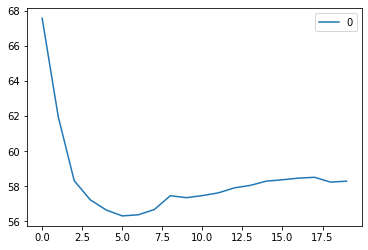

In [254]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

In [255]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9, 10, 11,12,13,14,15,16,17,18,19,20]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 20}

In [256]:
reg = KNeighborsRegressor(n_neighbors = 1)

In [257]:
#Fitting the model
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [258]:
from sklearn.metrics import mean_squared_error as mse

In [259]:
#Predicting over the test set
test_predict = reg.predict(X_test)
k = mse(test_predict, y_test)
print('Test MSE  ',k)

Test MSE   4500.649810303262


In [260]:
knn.fit(X_train,y_train)
test_score = knn.score(X_test,y_test)
train_score = knn.score(X_train,y_train)

In [261]:
print(test_score)

0.03920013394747923


In [262]:
print(train_score)

pred=reg.predict(X_test)
print("Accuracy={}%".format((sum(y_test==pred)/y_test.shape[0])*100))

0.3977079616706787
Accuracy=27.837921435199505%


In [263]:
# Create an array
knn_r_acc = []

In [ ]:
knn_r_acc.append((1, test_score ,train_score,"Accuracy={}%".format((sum(y_test==pred)/y_test.shape[0])*100)))

In [ ]:
print(knn_r_acc)

In [195]:
#Now we will do the same code, but with a smaller portion of the dataset, to adjust for distances
#split the datasets into the distances and train/test

zeroto3k_train = pd.read_excel("Downloads\Oversampled_TestSet_0-3km.xlsx")
zeroto35k_train = pd.read_excel("Downloads\Oversampled_TestSet_0-35km.xlsx")
zeroto85k_train = pd.read_excel("Downloads\Oversampled_TestSet_0-85km.xlsx")

zeroto3k_test = pd.read_excel("Downloads\TestSet_0-3km.xlsx")
zeroto35k_test = pd.read_excel("Downloads\TestSet_0-35km.xlsx")
zeroto85k_test = pd.read_excel("Downloads\TestSet_0-85km.xlsx")


In [196]:
#Set up y train and test for each
y_train_zeroto3k = zeroto3k_train['Deceased'].values
y_test_zeroto3k = zeroto3k_test['Deceased'].values

y_train_zeroto35k = zeroto35k_train['Deceased'].values
y_test_zeroto35k = zeroto35k_test['Deceased'].values

y_train_zeroto85k = zeroto85k_train['Deceased'].values
y_test_zeroto85k = zeroto85k_test['Deceased'].values

#set up x train and x test for each

zeroto3k_X_train = zeroto3k_train[['One_Month_Prior_Daily_Average_Precipitation','One_Month_Prior_Maximum_Hourly_Regular_Temperature',
                    'One_Month_Prior_Average_temperature_bulbo_seco',
                 'One_Month_Prior_Altitude', 'One_Month_Prior_Station_Latitude', 
                    'Two_Months_Prior_Average_temperature_bulbo_seco']].values

zeroto3k_X_test = zeroto3k_test[['One_Month_Prior_Daily_Average_Precipitation','One_Month_Prior_Maximum_Hourly_Regular_Temperature',
                    'One_Month_Prior_Average_temperature_bulbo_seco',
                 'One_Month_Prior_Altitude', 'One_Month_Prior_Station_Latitude', 
                    'Two_Months_Prior_Average_temperature_bulbo_seco']].values

zeroto35k_X_train = zeroto35k_train[['One_Month_Prior_Daily_Average_Precipitation','One_Month_Prior_Maximum_Hourly_Regular_Temperature',
                    'One_Month_Prior_Average_temperature_bulbo_seco',
                 'One_Month_Prior_Altitude', 'One_Month_Prior_Station_Latitude', 
                    'Two_Months_Prior_Average_temperature_bulbo_seco']].values

zeroto35k_X_test = zeroto35k_test[['One_Month_Prior_Daily_Average_Precipitation','One_Month_Prior_Maximum_Hourly_Regular_Temperature',
                    'One_Month_Prior_Average_temperature_bulbo_seco',
                 'One_Month_Prior_Altitude', 'One_Month_Prior_Station_Latitude', 
                    'Two_Months_Prior_Average_temperature_bulbo_seco']].values

zeroto85k_X_train = zeroto85k_train[['One_Month_Prior_Daily_Average_Precipitation','One_Month_Prior_Maximum_Hourly_Regular_Temperature',
                    'One_Month_Prior_Average_temperature_bulbo_seco',
                 'One_Month_Prior_Altitude', 'One_Month_Prior_Station_Latitude', 
                    'Two_Months_Prior_Average_temperature_bulbo_seco']].values

zeroto85k_X_test = zeroto85k_test[['One_Month_Prior_Daily_Average_Precipitation','One_Month_Prior_Maximum_Hourly_Regular_Temperature',
                    'One_Month_Prior_Average_temperature_bulbo_seco',
                 'One_Month_Prior_Altitude', 'One_Month_Prior_Station_Latitude', 
                    'Two_Months_Prior_Average_temperature_bulbo_seco']].values



In [197]:
from sklearn.neighbors import KNeighborsRegressor

#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_zeroto3k_scaled = scaler.fit_transform(zeroto3k_X_train)
x_train_zeroto3k = pd.DataFrame(x_train_zeroto3k_scaled)

x_test_zeroto3k_scaled = scaler.fit_transform(zeroto3k_X_test)
x_test_zeroto3k = pd.DataFrame(x_test_zeroto3k_scaled)


In [198]:
#test values for 0-3k

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train_zeroto3k, y_train_zeroto3k)  #fit the model
    pred=model.predict(x_test_zeroto3k) #make prediction on test set
    error = sqrt(mean_squared_error(y_test_zeroto3k,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    
  

RMSE value for k=  1 is: 0.8471889991312588
RMSE value for k=  2 is: 0.8406293041630034
RMSE value for k=  3 is: 0.8599909905622762
RMSE value for k=  4 is: 0.8755186096495444
RMSE value for k=  5 is: 0.8697908608833772
RMSE value for k=  6 is: 0.8699527679461396
RMSE value for k=  7 is: 0.8716181713349634
RMSE value for k=  8 is: 0.8721187042209112
RMSE value for k=  9 is: 0.8835001048757528
RMSE value for k=  10 is: 0.8862324889993335
RMSE value for k=  11 is: 0.8934201027268127
RMSE value for k=  12 is: 0.8965723614800889
RMSE value for k=  13 is: 0.8995821429463382
RMSE value for k=  14 is: 0.9009430024201757
RMSE value for k=  15 is: 0.9071837272863011
RMSE value for k=  16 is: 0.9097550949299962
RMSE value for k=  17 is: 0.91265318038895
RMSE value for k=  18 is: 0.9180253279362011
RMSE value for k=  19 is: 0.9206612900144276
RMSE value for k=  20 is: 0.9229459501623769


<AxesSubplot:>

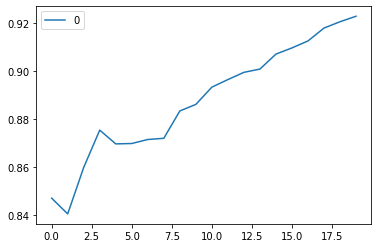

In [199]:
#Graph the k values
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

In [200]:

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9, 10, 11,12,13,14,15,16,17,18,19,20]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train_zeroto3k, y_train_zeroto3k)
model.best_params_

{'n_neighbors': 4}

In [201]:

#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt



In [204]:
reg = KNeighborsRegressor(n_neighbors = 4)

#Fitting the model
reg.fit(x_train_zeroto3k, y_train_zeroto3k)
from sklearn.metrics import mean_squared_error as mse


In [205]:
#Predicting over the test set
test_predict = reg.predict(x_test_zeroto3k)
k = mse(test_predict, y_test_zeroto3k)
print('Test MSE  ',k)
knn = neighbors.KNeighborsRegressor()
knn.fit(x_train_zeroto3k,y_train_zeroto3k)
test_score = knn.score(x_test_zeroto3k,y_test_zeroto3k)
train_score = knn.score(x_train_zeroto3k,y_train_zeroto3k)

print(test_score)

print(train_score)

pred=reg.predict(x_test_zeroto3k)
print("Accuracy={}%".format((sum(y_test_zeroto3k==pred)/y_test_zeroto3k.shape[0])*100))



Test MSE   0.7665328358426713
-0.40386266696681994
0.7612335476725218
Accuracy=67.89473684210526%


In [206]:
#Repeat for 0-35
from sklearn.neighbors import KNeighborsRegressor

#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_zeroto35k_scaled = scaler.fit_transform(zeroto35k_X_train)
x_train_zeroto35k = pd.DataFrame(x_train_zeroto35k_scaled)

x_test_zeroto35k_scaled = scaler.fit_transform(zeroto35k_X_test)
x_test_zeroto35k = pd.DataFrame(x_test_zeroto35k_scaled)



In [207]:
#test values for 0-35k

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train_zeroto35k, y_train_zeroto35k)  #fit the model
    pred=model.predict(x_test_zeroto35k) #make prediction on test set
    error = sqrt(mean_squared_error(y_test_zeroto35k,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.270918994642726
RMSE value for k=  2 is: 1.2567045042348142
RMSE value for k=  3 is: 1.2589504940442202
RMSE value for k=  4 is: 1.2651049076928018
RMSE value for k=  5 is: 1.2910749144532723
RMSE value for k=  6 is: 1.3572680171553302
RMSE value for k=  7 is: 1.3971056398318527
RMSE value for k=  8 is: 1.4097576351906744
RMSE value for k=  9 is: 1.446853847366364
RMSE value for k=  10 is: 1.4296543120476608
RMSE value for k=  11 is: 1.4200629138054686
RMSE value for k=  12 is: 1.401545105457736
RMSE value for k=  13 is: 1.3866316095391475
RMSE value for k=  14 is: 1.374040885456708
RMSE value for k=  15 is: 1.3718326160338616
RMSE value for k=  16 is: 1.383748705979704
RMSE value for k=  17 is: 1.3986709384481784
RMSE value for k=  18 is: 1.388792156749093
RMSE value for k=  19 is: 1.386667702957476
RMSE value for k=  20 is: 1.397873129670123


{'n_neighbors': 19}

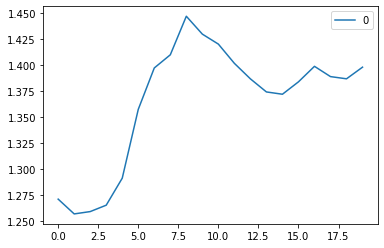

In [208]:
#Graph the k values
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()


from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9, 10, 11,12,13,14,15,16,17,18,19,20]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train_zeroto35k, y_train_zeroto35k)
model.best_params_

In [210]:

#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

reg = KNeighborsRegressor(n_neighbors = 19)

#Fitting the model
reg.fit(x_train_zeroto35k, y_train_zeroto35k)
from sklearn.metrics import mean_squared_error as mse


#Predicting over the test set
test_predict = reg.predict(x_test_zeroto35k)
k = mse(test_predict, y_test_zeroto35k)
print('Test MSE  ',k)
knn = neighbors.KNeighborsRegressor()
knn.fit(x_train_zeroto35k,y_train_zeroto35k)
test_score = knn.score(x_test_zeroto35k,y_test_zeroto35k)
train_score = knn.score(x_train_zeroto35k,y_train_zeroto35k)

print(test_score)

print(train_score)

pred=reg.predict(x_test_zeroto35k)
print("Accuracy={}%".format((sum(y_test_zeroto35k==pred)/y_test_zeroto35k.shape[0])*100))

Test MSE   1.9228473184253634
-1.058831171769551
0.6185151800057591
Accuracy=31.627218934911244%


In [211]:
#Repeat for 0-85
from sklearn.neighbors import KNeighborsRegressor

#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_zeroto85k_scaled = scaler.fit_transform(zeroto85k_X_train)
x_train_zeroto85k = pd.DataFrame(x_train_zeroto85k_scaled)

x_test_zeroto85k_scaled = scaler.fit_transform(zeroto85k_X_test)
x_test_zeroto85k = pd.DataFrame(x_test_zeroto85k_scaled)




In [212]:
#test values for 0-85k

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train_zeroto85k, y_train_zeroto85k)  #fit the model
    pred=model.predict(x_test_zeroto85k) #make prediction on test set
    error = sqrt(mean_squared_error(y_test_zeroto85k,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 2.052451900380465
RMSE value for k=  2 is: 1.591880042409112
RMSE value for k=  3 is: 2.0392729683359327
RMSE value for k=  4 is: 1.8874904895258693
RMSE value for k=  5 is: 1.7173955652516126
RMSE value for k=  6 is: 1.6171780109126668
RMSE value for k=  7 is: 1.5597249951323602
RMSE value for k=  8 is: 1.5746746643846588
RMSE value for k=  9 is: 1.5465086339862186
RMSE value for k=  10 is: 1.5234070804376252
RMSE value for k=  11 is: 1.5788164619548264
RMSE value for k=  12 is: 1.5544350083770253
RMSE value for k=  13 is: 1.5396376916544412
RMSE value for k=  14 is: 1.5262333035161935
RMSE value for k=  15 is: 1.5199932635931621
RMSE value for k=  16 is: 1.5092673930662486
RMSE value for k=  17 is: 1.4974709696836264
RMSE value for k=  18 is: 1.49065141259378
RMSE value for k=  19 is: 1.4902647437067227
RMSE value for k=  20 is: 1.4869371808339522


{'n_neighbors': 2}

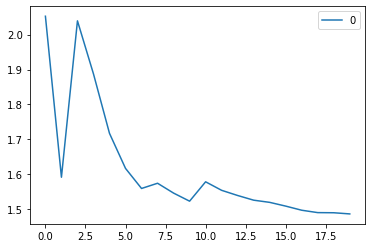

In [213]:
#Graph the k values
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()


from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9, 10, 11,12,13,14,15,16,17,18,19,20]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train_zeroto85k, y_train_zeroto85k)
model.best_params_

In [215]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

reg = KNeighborsRegressor(n_neighbors = 2)

#Fitting the model
reg.fit(x_train_zeroto85k, y_train_zeroto85k)
from sklearn.metrics import mean_squared_error as mse


#Predicting over the test set
test_predict = reg.predict(x_test_zeroto85k)
k = mse(test_predict, y_test_zeroto85k)
print('Test MSE  ',k)
knn = neighbors.KNeighborsRegressor()
knn.fit(x_train_zeroto85k,y_train_zeroto85k)
test_score = knn.score(x_test_zeroto85k,y_test_zeroto85k)
train_score = knn.score(x_train_zeroto85k,y_train_zeroto85k)

print(test_score)

print(train_score)

pred=reg.predict(x_test_zeroto85k)
print("Accuracy={}%".format((sum(y_test_zeroto85k==pred)/y_test_zeroto85k.shape[0])*100))

Test MSE   2.534082069420436
-2.791772212471027
0.7160069264680298
Accuracy=76.7132867132867%
